In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

df = pd.read_csv('files/prueba_op_maestra_cuotas_pagos_mes_hist_enmascarado_completa.csv')

print("Número de filas en cada DataFrame:")
print("prueba_op_maestra_cuotas_pagos_mes_hist_enmascarado_completa.csv", len(df))

df.head(10)

Número de filas en cada DataFrame:
prueba_op_maestra_cuotas_pagos_mes_hist_enmascarado_completa.csv 4855035


,nit_enmascarado,num_oblig_enmascarado,fecha_corte,producto,aplicativo,segmento,valor_cuota_mes,pago_total,fecha_pago_minima,fecha_pago_maxima,porc_pago,marca_pago,ajustes_banco
0,482906,362297,20230731,CARTERA MICROCREDITO,L,MICROPYME,311950.0,1862788.0,20230621.0,20230721.0,597.0,PAGO_MENOS,NO
1,121735,186855,20230228,LIBRE INVERSION,L,SOCIAL,131030.0,264157.0,20230127.0,20230207.0,202.0,PAGO_MENOS,NO
2,582719,675503,20231031,TARJETA DE CREDITO,K,PERSONAL,1405339.0,3320.0,20231003.0,20231003.0,0.0,PAGO_MENOS,NO
3,299903,107931,20230228,ROTATIVOS,L,PERSONAL PLUS,19220.0,0.0,NaN,NaN,0.0,FACTURACION_MES_SGTE,NO
4,88625,566060,20230430,ROTATIVOS,L,PERSONAL,384684.0,769368.0,20230403.0,20230403.0,200.0,PAGO_MAS,NO
5,25029,324131,20230630,LIBRE INVERSION,L,PREFERENCIAL,2232058.0,100000.0,20230531.0,20230531.0,4.0,IGUAL,NO
6,271030,105944,20230430,LIBRE INVERSION,L,PERSONAL PLUS,1403999.0,5602093.0,20230330.0,20230331.0,399.0,PAGO_MAS,NO
7,535835,639317,20231231,TARJETA DE CREDITO,K,PERSONAL,395828.0,0.0,NaN,NaN,0.0,NO_PAGO,NO
8,497594,685488,20230531,TARJETA DE CREDITO,K,PERSONAL,1031953.0,2063908.0,20230511.0,20230511.0,200.0,PAGO_MAS,NO
9,296985,846060,20230131,TARJETA DE CREDITO,V,PERSONAL PLUS,1237998.0,1240000.0,20221227.0,20221227.0,100.0,IGUAL,NO


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4855035 entries, 0 to 4855034
Data columns (total 13 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   nit_enmascarado        int64  
 1   num_oblig_enmascarado  int64  
 2   fecha_corte            int64  
 3   producto               object 
 4   aplicativo             object 
 5   segmento               object 
 6   valor_cuota_mes        float64
 7   pago_total             float64
 8   fecha_pago_minima      float64
 9   fecha_pago_maxima      float64
 10  porc_pago              float64
 11  marca_pago             object 
 12  ajustes_banco          object 
dtypes: float64(5), int64(3), object(5)
memory usage: 481.5+ MB


In [6]:
print(df.describe())

       nit_enmascarado  num_oblig_enmascarado   fecha_corte  valor_cuota_mes  \
count     4.855035e+06           4.855035e+06  4.855035e+06     4.855035e+06   
mean      3.086698e+05           5.589428e+05  2.023070e+07     7.848605e+05   
std       1.828413e+05           3.104789e+05  3.368710e+02     2.385167e+06   
min       1.000000e+00           3.000000e+00  2.023013e+07     0.000000e+00   
25%       1.527720e+05           2.944890e+05  2.023043e+07     1.432780e+05   
50%       3.002020e+05           5.737760e+05  2.023073e+07     3.397260e+05   
75%       4.653040e+05           8.263360e+05  2.023103e+07     7.626480e+05   
max       6.347090e+05           1.080719e+06  2.023123e+07     7.050000e+08   

         pago_total  fecha_pago_minima  fecha_pago_maxima  porc_pago  
count  4.855035e+06       3.458521e+06       3.458521e+06  4777659.0  
mean   1.599052e+06       2.023031e+07       2.023048e+07        inf  
std    9.732190e+06       1.716631e+03       1.245694e+03        N

In [9]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [7]:
df['fecha_corte'] = pd.to_datetime(df['fecha_corte'])
df['fecha_pago_minima'] = pd.to_datetime(df['fecha_pago_minima'])
df['fecha_pago_maxima'] = pd.to_datetime(df['fecha_pago_maxima'])

df['fecha_corte'] = pd.to_datetime(df['fecha_corte']).dt.strftime('%Y%m%d')
df['fecha_pago_minima'] = pd.to_datetime(df['fecha_pago_minima']).dt.strftime('%Y%m%d')
df['fecha_pago_maxima'] = pd.to_datetime(df['fecha_pago_maxima']).dt.strftime('%Y%m%d')

df['fecha_corte'] = pd.to_datetime(df['fecha_corte'])
df['fecha_pago_minima'] = pd.to_datetime(df['fecha_pago_minima'])
df['fecha_pago_maxima'] = pd.to_datetime(df['fecha_pago_maxima'])

<Figure size 1200x600 with 0 Axes>

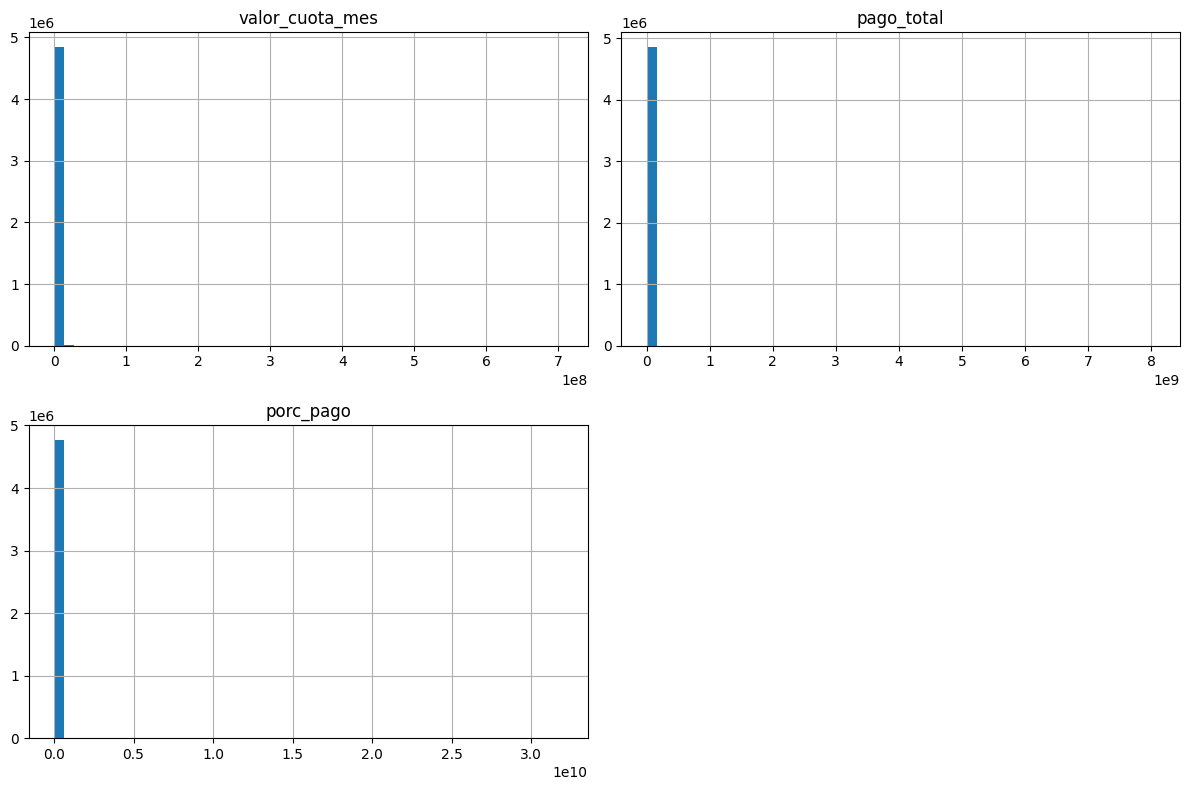

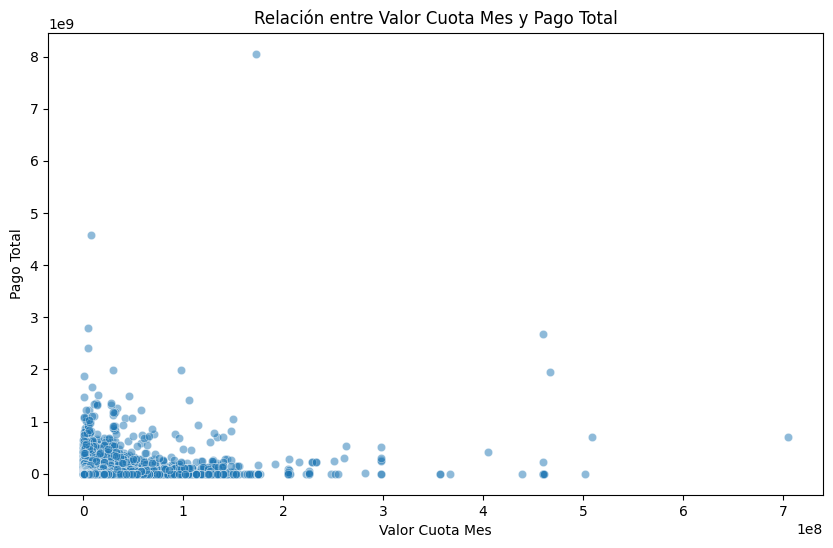

In [11]:
plt.figure(figsize=(12, 6))
df[['valor_cuota_mes', 'pago_total', 'porc_pago']].hist(bins=50, figsize=(12, 8))
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='valor_cuota_mes', y='pago_total', data=df, alpha=0.5)
plt.title('Relación entre Valor Cuota Mes y Pago Total')
plt.xlabel('Valor Cuota Mes')
plt.ylabel('Pago Total')
plt.show()



In [26]:
df[['fecha_corte', 'fecha_pago_minima', 'fecha_pago_maxima']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4855035 entries, 0 to 4855034
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   fecha_corte        datetime64[ns]
 1   fecha_pago_minima  datetime64[ns]
 2   fecha_pago_maxima  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 111.1 MB


In [13]:
# Crear la nueva feature 'dias_mora'
df['dias_mora'] = (df['fecha_pago_maxima'] - df['fecha_pago_minima']).dt.days
df['dias_mora'] = df['dias_mora'].apply(lambda x: 0 if x <= 1 else x)
print(df[['fecha_pago_minima', 'fecha_pago_maxima', 'dias_mora']].head(10))

  fecha_pago_minima fecha_pago_maxima  dias_mora
0        1970-01-01        1970-01-01        0.0
1        1970-01-01        1970-01-01        0.0
2        1970-01-01        1970-01-01        0.0
3               NaT               NaT        NaN
4        1970-01-01        1970-01-01        0.0
5        1970-01-01        1970-01-01        0.0
6        1970-01-01        1970-01-01        0.0
7               NaT               NaT        NaN
8        1970-01-01        1970-01-01        0.0
9        1970-01-01        1970-01-01        0.0


In [14]:
df['dias_mora'].isna().sum()

1396514

In [15]:
# Contar valores nulos en las columnas de fecha
nulos_fechas = df[['fecha_corte', 'fecha_pago_minima', 'fecha_pago_maxima']].isnull().sum()
print("Valores nulos en columnas de fecha:")
print(nulos_fechas)

porcentaje_nulos = (nulos_fechas / len(df)) * 100
print("\nPorcentaje de valores nulos:")
print(porcentaje_nulos)

Valores nulos en columnas de fecha:
fecha_corte                0
fecha_pago_minima    1396514
fecha_pago_maxima    1396514
dtype: int64

Porcentaje de valores nulos:
fecha_corte           0.000000
fecha_pago_minima    28.764242
fecha_pago_maxima    28.764242
dtype: float64


In [16]:
condiciones = (df['marca_pago'].isin(['NO_PAGO', 'SIN_FACTURACION']))
df.loc[condiciones, 'dias_mora'] = 15

In [17]:

print("Relación con 'marca_pago':")
print(df[['marca_pago', 'fecha_pago_minima', 'fecha_pago_maxima']].groupby('marca_pago').apply(lambda x: x[['fecha_pago_minima', 'fecha_pago_maxima']].isnull().mean()))


print("\nRelación con 'pago_total':")
print(df[['pago_total', 'fecha_pago_minima', 'fecha_pago_maxima']].groupby(df['pago_total'] > 0).apply(lambda x: x[['fecha_pago_minima', 'fecha_pago_maxima']].isnull().mean()))

print("\nDistribución por producto:")
print(df[['producto', 'fecha_pago_minima', 'fecha_pago_maxima']].groupby('producto').apply(lambda x: x[['fecha_pago_minima', 'fecha_pago_maxima']].isnull().mean()))

print("\nRelación con 'ajustes_banco':")
print(df[['ajustes_banco', 'fecha_pago_minima', 'fecha_pago_maxima']].groupby('ajustes_banco').apply(lambda x: x[['fecha_pago_minima', 'fecha_pago_maxima']].isnull().mean()))

print("\nEstadísticas adicionales:")
print(df[['pago_total', 'valor_cuota_mes', 'porc_pago']].describe())

# Conteo de valores únicos en columnas categóricas
print("\nConteo de valores únicos en columnas categóricas:")
for col in ['producto', 'aplicativo', 'segmento', 'marca_pago', 'ajustes_banco']:
    print(f"\n{col}:")
    print(df[col].value_counts(normalize=True))


Relación con 'marca_pago':
                      fecha_pago_minima  fecha_pago_maxima
marca_pago                                                
AJUSTES_BANCO                  0.000000           0.000000
CANCELADO                      0.065745           0.065745
FACTURACION_MES_SGTE           0.408452           0.408452
IGUAL                          0.470162           0.470162
NO_PAGO                        0.931320           0.931320
PAGO_MAS                       0.000000           0.000000
PAGO_MENOS                     0.074917           0.074917
SIN_FACTURACION                1.000000           1.000000

Relación con 'pago_total':
            fecha_pago_minima  fecha_pago_maxima
pago_total                                      
False                0.872322           0.872322
True                 0.000000           0.000000

Distribución por producto:
                      fecha_pago_minima  fecha_pago_maxima
producto                                                  
ANTICIPOS    

In [18]:
df['dias_mora'] = df['dias_mora'].fillna(0)


In [19]:
selected_features =['nit_enmascarado', 'num_oblig_enmascarado', 'producto','dias_mora','valor_cuota_mes','marca_pago']

In [34]:
df[selected_features].to_csv('processed_files/historic.csv')

### 1. Análisis de la Eficacia del Pago por Producto:
Cartera Consumo muestra una alta incidencia en la falta de pago (NO_PAGO), lo que indica un riesgo elevado en este segmento. Podría ser necesario revisar las políticas de crédito y el perfil de los clientes en este segmento.
TARJETA DE CREDITO representa la mayor proporción de productos, pero tiene un comportamiento de pago variable, con un 45.71% del total de las obligaciones. Este producto puede ser un área clave para optimizar, dado su impacto significativo en el portafolio.
LIBRE INVERSION también tiene un alto volumen de operaciones (33.88%), lo que sugiere que es un producto muy popular pero con un comportamiento de pago que podría mejorarse, especialmente dado el contexto de la relación NO_PAGO.
### 2. Comportamiento de Pago por Segmento:
Segmento PERSONAL tiene la mayor proporción (63.24%) de los clientes, lo que podría sugerir un enfoque más intensivo en la gestión de la cartera de este grupo. Dado el tamaño de este segmento, cualquier mejora en el comportamiento de pago podría tener un impacto significativo en los resultados globales.
MICROPYME y SOCIAL también son áreas importantes a observar, ya que juntas suman casi el 13% del total, pero su comportamiento de pago podría ser un riesgo si no se gestiona adecuadamente.
### 3. Efectividad de los Ajustes Bancarios:
Los ajustes bancarios (AJUSTES_BANCO) tienen un impacto limitado en la recuperación de cartera, lo que puede indicar que estos no están siendo suficientemente efectivos. Con solo un 1.02% de operaciones involucradas en ajustes, parece que las estrategias de ajuste no son una solución viable a gran escala para mejorar el comportamiento de pago.
La categoría REDIFERIDOS tiene una pequeña proporción (1.71%), lo que indica una baja necesidad o efectividad en el refinanciamiento de deuda. Esto sugiere que las estrategias de cobro pueden estar fallando en una fase temprana antes de que sea necesario refinanciar.
### 4. Impacto del Pago Total:
Los clientes que han realizado el pago total (pago_total=True) representan una pequeña fracción, lo que indica que la mayoría de las cuentas aún están en curso o no se han liquidado completamente. Esto podría señalar una oportunidad para mejorar la comunicación con los clientes y fomentar el pago total mediante incentivos o facilidades.
Un alto porcentaje de cuentas con pago_total=False sugiere que las estrategias actuales para incentivar el pago completo no son suficientemente efectivas.
### 5. Análisis de Aplicativos:
La distribución por aplicativos muestra que L y M son los más usados, representando juntos más del 70% de las transacciones. Esto podría ser indicativo de una concentración en ciertas plataformas o canales, lo cual puede ser beneficioso en términos de manejo de riesgos, pero también plantea la necesidad de asegurar la robustez de estos canales principales.
### 6. Conclusión:
La estrategia de gestión de cartera debe enfocarse en optimizar el comportamiento de pago de productos clave como TARJETA DE CREDITO y LIBRE INVERSION. Además, se debería evaluar si los segmentos de PERSONAL y MICROPYME están adecuadamente atendidos con las estrategias actuales de cobro y ajuste.
Se podría considerar la revisión de las políticas de refinanciamiento y ajustes, ya que parecen tener un impacto limitado en la recuperación de cartera.
En resumen, optimizar las políticas de crédito, los canales de comunicación, y los incentivos de pago podrían mejorar significativamente el comportamiento de pago y, en consecuencia, la rentabilidad general del negocio.

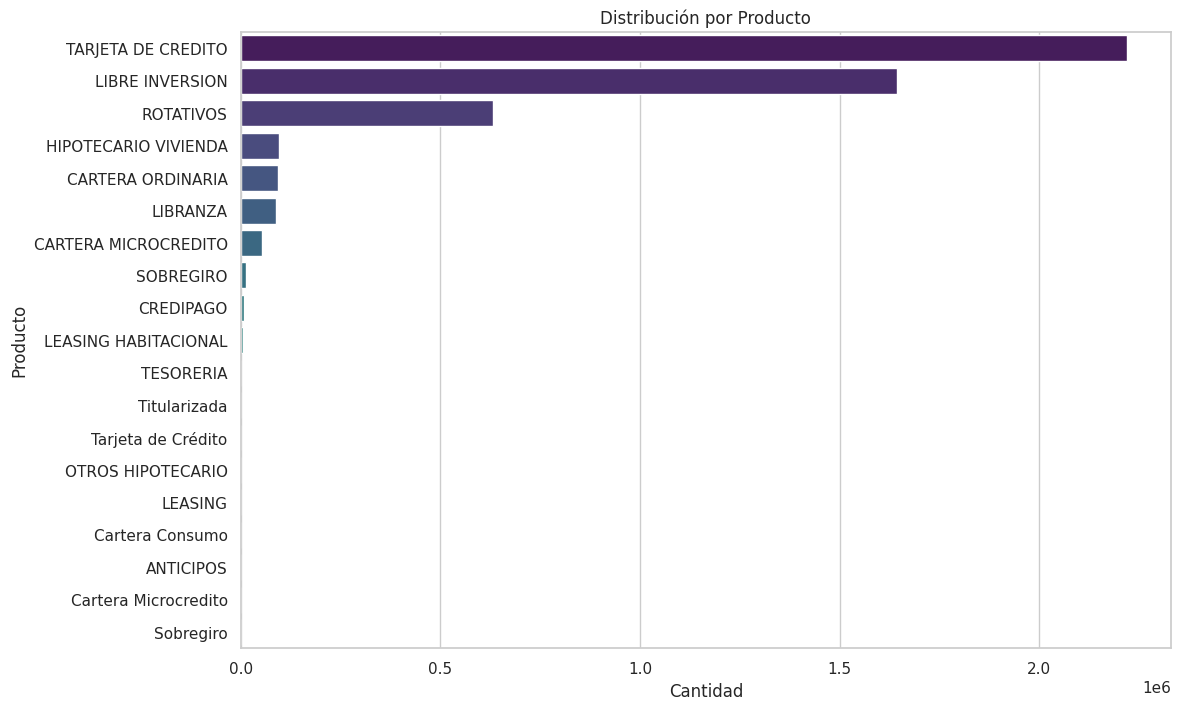

In [20]:

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Gráfico de Distribución por Producto
plt.figure(figsize=(12, 8))
sns.barplot(x=df['producto'].value_counts().values, y=df['producto'].value_counts().index, palette='viridis')
plt.title('Distribución por Producto')
plt.xlabel('Cantidad')
plt.ylabel('Producto')
plt.show()




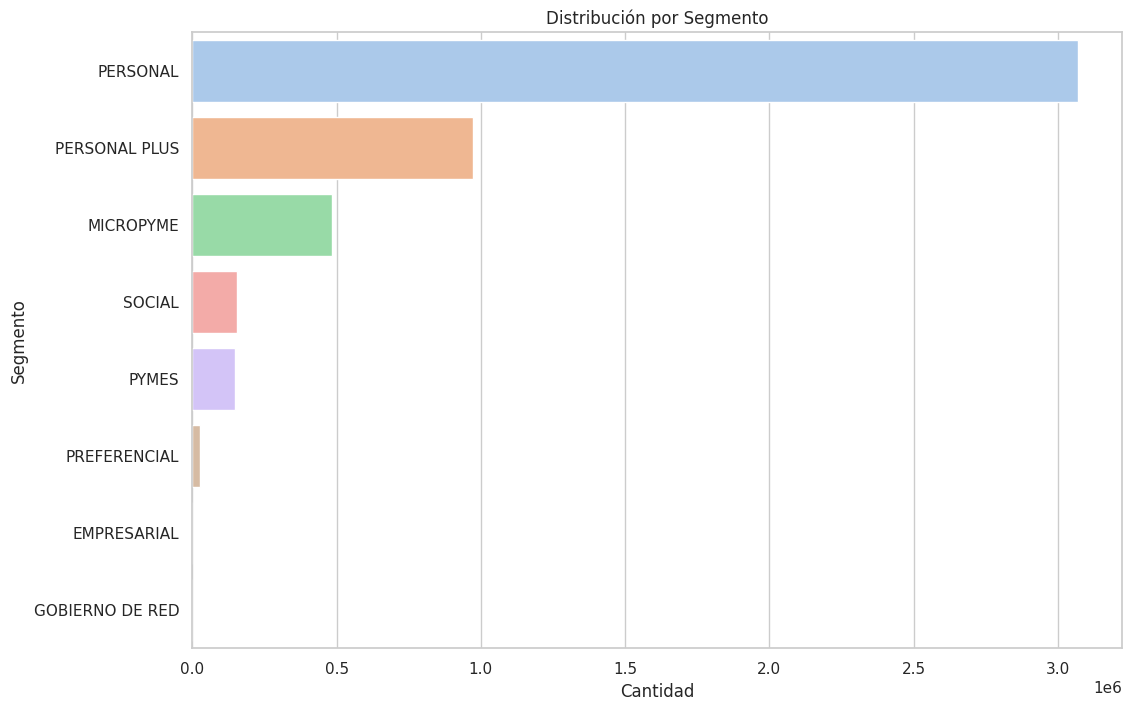

In [22]:
# Gráfico de Distribución por Segmento
segmento_summary = df['segmento'].value_counts().reset_index()
segmento_summary.columns = ['segmento', 'proporcion']

plt.figure(figsize=(12, 8))
sns.barplot(x='proporcion', y='segmento', data=segmento_summary, palette='pastel')
plt.title('Distribución por Segmento')
plt.xlabel('Cantidad')
plt.ylabel('Segmento')
plt.show()



